# Data Science for Social Justice Workshop Group Project: Ukraine


## 1. Preprocessing

### 1-1. Importing Data with pandas

In [1]:
%pwd ##it will be different for all

'/home/jovyan/Data-Science-Social-Justice'

In [2]:
import os

In [3]:
os.chdir('data') ##it will be different for all

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('submissions.csv')

In [6]:
df.shape

(88764, 18)

In [7]:
# 18 variables
list (df)

['idint',
 'idstr',
 'created',
 'self',
 'nsfw',
 'author',
 'title',
 'url',
 'selftext',
 'score',
 'subreddit',
 'distinguish',
 'textlen',
 'num_comments',
 'flair_text',
 'flair_css_class',
 'augmented_at',
 'augmented_count']

In [8]:
df.head()

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,13054757,t3_7rt45,1232688225,0,0,nikitos2009,Лучший политический ресурс в Украине,http://pepper.at.ua/,NaN,0,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
1,13072291,t3_7s6n7,1232834472,1,0,OlehM,Dr,NaN,[removed],1,ukraine,NaN,9,0,NaN,NaN,NaN,NaN
2,13093545,t3_7sn1l,1233019738,0,0,nikitos2009,Основы гармонии украинства с московством,http://pepper.at.ua/publ/8-1-0-30,NaN,1,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
3,13118896,t3_7t6ls,1233182615,0,0,nikitos2009,Служба Бандеризации Украины выясняет кто убил ...,http://pepper.at.ua/publ/8-1-0-34,NaN,1,ukraine,NaN,0,0,NaN,NaN,NaN,NaN
4,13238506,t3_7vqwa,1234081946,0,0,ger4antche,amzek.blogspot.com,http://amzek.blogspot.com,NaN,0,ukraine,NaN,0,1,NaN,NaN,NaN,NaN


### 1-2. Dropping Columns and Missing Values

In [9]:
##remove some columns that we are not going to use

df = df.drop(['self', 'url', 'subreddit', 'augmented_at', 'augmented_count'], axis=1)
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,13054757,t3_7rt45,1232688225,0,nikitos2009,Лучший политический ресурс в Украине,NaN,0,NaN,0,0,NaN,NaN
1,13072291,t3_7s6n7,1232834472,0,OlehM,Dr,[removed],1,NaN,9,0,NaN,NaN
2,13093545,t3_7sn1l,1233019738,0,nikitos2009,Основы гармонии украинства с московством,NaN,1,NaN,0,0,NaN,NaN
3,13118896,t3_7t6ls,1233182615,0,nikitos2009,Служба Бандеризации Украины выясняет кто убил ...,NaN,1,NaN,0,0,NaN,NaN
4,13238506,t3_7vqwa,1234081946,0,ger4antche,amzek.blogspot.com,NaN,0,NaN,0,1,NaN,NaN


In [10]:
##get rid of posts that have been deleted/removed

df = df.loc[~df['selftext'].isin(['[removed]', '[deleted]' ]),:]
df.shape

(73414, 13)

In [11]:
## drop null values
df = df.dropna(subset=['selftext'])
df.shape

(16665, 13)

In [12]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
35,26781072,t3_fy0eo,1299351508,0,margys,"Мам, а когда я выросту, ты постареешь?...",Сегодня моя золотая птичка снова задалась вопр...,0,NaN,204,0,NaN,NaN
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN


In [13]:
##remove the rows with non-enlish text
##!pip install langdetect
##from langdetect import detect
##df['detect'] = detect(str(df['selftext']))

In [14]:
##df.head()

In [15]:
##df = df[df['detect'] == 'en']

### MJ: Q. The command above did not give correct results e.g., the first row is in Russian, but the detect column says it is English. It is why the dataframe still have 16665 rows. So I tried the command below, but encountered error. I just moved on to next steps. We can apply the language detection codes later and run the notebook again:)


In [16]:
##df['detect2'] = df['selftext'].apply(detect) 

In [17]:
df = df[df['selftext'].map(lambda x: x.isascii())]

In [18]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN
64,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,6,NaN,381,17,NaN,NaN


In [19]:
df.shape

(12421, 13)

In [20]:
#number of unique users
print (df.iloc[:,4].nunique())



8723


In [21]:
#frequency by user
frequency = df['author'].value_counts()

In [22]:
#top 50
frequency.head(50)


[deleted]               167
iceman530                33
TheRealMykola            32
redpillbjj               30
unknown_wtc              27
arleitiss                26
shadowb3astxx            25
snaxks1                  25
tgromy                   24
Motor-Ad-8858            22
koyanis                  21
Accomplished-Car-779     20
ammofordays              20
JupiterQuirinus          20
jediprime74              20
dmytronalyvaiko          18
prayyboii                18
eff-snarf                17
globustr                 17
user00067                16
EoghanMuzyka             16
samuraipenguin123        16
Jesuismieux412           15
Notagelding              15
ImPlayingTheSims         15
Key_Brother              14
FenixWater75             14
Space_Lion2077           14
Futurist110              13
h6story                  13
AllAboutRussia           13
noriumiego               13
MerryPrankster1967       13
cccbig                   12
ChriskiV                 12
wogwe               

In [23]:
#mean 
frequency.mean()

1.4239367190186862

In [24]:
##check
12421/8723

1.4239367190186862

In [25]:
#average number of workds in selftext
count = df['selftext'].str.split().str.len()


In [26]:
count

36         2
50        42
51        51
62        80
64        71
        ... 
88729     30
88736    103
88747      1
88758    309
88761     12
Name: selftext, Length: 12421, dtype: int64

In [27]:
count.mean()

74.58256179051607

### 1-3. Cleaning Text Data

In [28]:
##!pip install spacy
##!python -m spacy download en_core_web_sm

In [29]:
# Import spaCy
import spacy
# Load the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

2022-07-21 16:06:32.433113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-21 16:06:32.433149: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [30]:
# Test: Parse the first reddit post in the dataset
parsed_post = nlp(df.selftext.iloc[0])
print(parsed_post)

Seems quiet. 


In [31]:
# Print each sentence in the parsed post
for idx, sentence in enumerate(parsed_post.sents):  
    ##In python, .sents is used for "sentence segmentation" which is present inside spacy. 
    print(f'Sentence {idx + 1}')
    print(sentence)
    print('') #space

Sentence 1
Seems quiet.



In [32]:
# Extract the first 15 items for the following properties of the parsed post

# The token text 
token_text = [token.orth_ for token in parsed_post][:15]   
# Part of speech 
token_pos = [token.pos_ for token in parsed_post][:15]   
# Lemma (or 'dictionary form')
token_lemma = [token.lemma_ for token in parsed_post][:15]
# Stop word? t/f
token_stop = [token.is_stop for token in parsed_post][:15]
# Puncutation? t/f
token_punct = [token.is_punct for token in parsed_post][:15]

# Make a dataframe with these items
pd.DataFrame(zip(token_text, token_pos, token_lemma, token_stop, token_punct),
             columns=['token_text', 'part_of_speech', 'token_lemma', 'token_stop', 'token_punct'])

,token_text,part_of_speech,token_lemma,token_stop,token_punct
0,Seems,VERB,seem,True,False
1,quiet,ADJ,quiet,False,False
2,.,PUNCT,.,False,True


### 1-4. Preprocessing all data

In [33]:
import spacy
nlp = spacy.load('en_core_web_sm')
from gensim.models.phrases import Phrases, Phraser

In [34]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df, text_col='selftext'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in df[text_col]:
        yield text.replace('\n', '')

def preprocess(df, text_col='selftext', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to a dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["tok2vec", "ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens
       # Remove url
def remove_URL(df, text_col='selftext'):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", text_col)


In [35]:
# This may take a while
lemmas = [line for line in preprocess(df)]

In [36]:
lemmas[2]

['hi',
 'like',
 'visit',
 'ukraine',
 'time',
 'looking',
 'cheap',
 'tickets',
 'seoul->kiev->seoul',
 'june',
 'june',
 'flexible',
 'seoul',
 'june',
 '25/26).could',
 'suggest',
 'cheapest',
 'way',
 'fly?thanks',
 'advance']

In [37]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,3,NaN,386,1,NaN,NaN
64,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,6,NaN,381,17,NaN,NaN


### 1-5.Phrase Modeling with `gensim`

In [38]:
from gensim.models.phrases import Phrases, Phraser

# Create bigram and trigram models
bigram = Phrases(lemmas, min_count=10, threshold=100)
trigram = Phrases(bigram[lemmas], min_count=10, threshold=50)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Form trigrams
trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in lemmas]

In [39]:
# Join each into a string
trigrams_joined = [' '.join(trigram) for trigram in trigrams]
trigrams_joined[0]

'quiet'

In [40]:
#We can use .keys() to identify the bigrams in the dataset. How many bigrams were identified by the parser?
len(bigram_phraser.phrasegrams.keys())

154

In [41]:
#Look at biagrams
list(bigram_phraser.phrasegrams.keys())[:10]

['shed_light',
 'years_ago',
 'thanks_advance',
 'eastern_europe',
 'english_speakers',
 'cross_border',
 'story_short',
 'new_york',
 'e_mail',
 'google_translate']

In [42]:
# Look at trigrams
[trigram for trigram in list(trigram_phraser.phrasegrams.keys()) if trigram.count('_') == 2]

['point_right_direction',
 'long_story_short',
 '=_png&auto_=',
 '=_webp&s_=',
 'view_poll](https://www.reddit.com_poll',
 'air_raid_sirens',
 'air_raid_siren',
 'nuclear_power_plant']

### 1-6. Save the file after preprocessing

In [43]:
# Inserting next to selftext column
df.insert(loc=7, column='lemmas', value=trigrams_joined)
# Removing empty rows in lemmas
df = df[~df['lemmas'].isin([''])]

In [44]:
df.head()

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
36,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
50,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
51,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN
62,33263382,t3_jsy6u,1314200067,0,lsakbaetle3r9,looking for someone,had a friend who moved to my town ~4-5 years a...,friend moved town ~4 years ago.he myspace acce...,3,NaN,386,1,NaN,NaN
64,34553372,t3_kkljw,1316449514,0,[deleted],[Ukraine] Can you tell me what my surname means?,Hey /r/ukraine! I am trying to connect with m...,hey /r ukraine trying connect roots trying fin...,6,NaN,381,17,NaN,NaN


In [45]:
#most frequent lemmas
lemmacount = df['lemmas'].value_counts()

In [46]:
lemmacount

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [47]:
# Save to new csv
df.to_csv('ukraine_lemmas.csv', index=False)

### For the next steps, make sure to use the file: 'ukraine_lemmas.csv'

## 2. Exploring Texts 



### 2-1. Diving Deeper into `pandas`

In [48]:
df = pd.read_csv('ukraine_lemmas.csv')

In [49]:
df.head(3)

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN


In [50]:
# Sort dataframe by highest scores
df.sort_values(by=['score'], ascending=False)[:3]

,idint,idstr,created,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
6719,1753516706,t3_szzy5e,1645671618,0,soff_mm,It is an honor to be a Ukrainian at this hour.,We're staying strong. Support the Armed Forces...,staying strong support armed_forces ukraine,48955,NaN,66,2154,NaN,NaN
11667,1766534572,t3_t7qyss,1646540863,0,sharag123,It is almost 7am and the Sun has Risen on the ...,&#x200B;,x200b,33895,NaN,39,531,WAR,war
7630,1755924903,t3_t1fkbr,1645825902,0,Arskaaaaa,Cell number of representative of the Russian M...,[ Removed by reddit on account of violating th...,removed reddit account violating content polic...,21197,NaN,0,266,NaN,NaN


In [51]:
# rows with a score higher than 500
df_top = df.loc[df['score'] >= 500, :]
len(df_top)

306

In [52]:
# unique value counts for a column
df.flair_text.value_counts()

Russian-Ukrainian War       1311
Question                    1029
Discussion                   916
News                         277
Request                      172
WAR                          155
Travel                       124
Military                      91
Humor                         48
Russo-Ukrainian War           46
Media                         46
Social Media                  46
History                       42
Moving to Ukraine             26
Music                         21
WAR CRIME                     19
Shitpost                      18
War Crimes                    18
Important                     10
Cuisine                       10
Video                          8
Social media                   8
Photo                          8
Government (Unconfirmed)       6
Russian Protest                6
Tweet                          4
Unconfirmed                    3
ASTARTES                       1
Goverment (Unconfirmed)        1
RATE MY BORSHCH!               1
Need help 

### 2-2 Type-token ratio

In [53]:
# compute the TTR

def type_token_ratio(tokens):
    """Calculates type-token ratio on tokens."""
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [54]:
#loop over the first 10 lemmatized submissions into dataframe

for text in df['lemmas'][:10]:
    tokens = text.split()
    print('Text:\n', text)
    print('TTR:', type_token_ratio(tokens), '\n')

Text:
 quiet
TTR: 1.0 

Text:
 stayed days days days know borispol pretty strict checking ones passport simferopol airport strict better use land border crossing lviv poland
TTR: 0.8571428571428571 

Text:
 hi like visit ukraine time looking cheap tickets seoul->kiev->seoul june june flexible seoul june 25/26).could suggest cheapest way fly?thanks advance
TTR: 0.9 

Text:
 friend moved town ~4 years ago.he myspace accessed long time.he mail.ru email played drugswars.ru game lolhes kiev wondering knows uk social networking site maybe me?pm u wanna help nt wanna blast
TTR: 0.967741935483871 

Text:
 hey /r ukraine trying connect roots trying find meaning sticks usa hlusko found lemko origin people caspian mountains language supposed like ukrainian shed_light me?tldr hlusko mean language
TTR: 0.8888888888888888 

Text:
 redditors sure day probably monday tuesday 27.09
TTR: 1.0 

Text:
 new reddit
TTR: 1.0 

Text:
 friends working school project nuclear disaster chernobyl years_ago booked 

### 2-3 Processing and Analyzing Language with `Text()`

In [55]:
# Run if you do not have nltk installed
##!pip install nltk

In [56]:
tokens = []
for idx, row in enumerate(df['lemmas']):
    # Notice that we put all tokens in the same list
    tokens.extend(row.split(' '))

In [57]:
import nltk
nltk.download('stopwords')
from nltk.text import Text

##aita_tokens = Text(tokens)
ukraine_tokens = Text(tokens) ##MJ: I changed the name to make it corresponding to our dataset

[nltk_data] Downloading package stopwords to /opt/conda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Concordances

In [58]:
ukraine_tokens.collocation_list()

[('removed][view_poll](https://www.reddit.com', 'poll'),
 ('=_png&auto', '=_webp&s_='),
 ('let', 'know'),
 ('=_pjpg&auto', '=_webp&s_='),
 ('russian', 'soldiers'),
 ('feel', 'like'),
 ('speak', 'russian'),
 ('pro', 'russian'),
 ('russian', 'propaganda'),
 ('deleted][view_poll](https://www.reddit.com', 'poll'),
 ('best', 'way'),
 ('russian', 'troops'),
 ('speak', 'ukrainian'),
 ('good', 'idea'),
 ('want', 'help'),
 ('russian', 'army'),
 ('russian', 'invasion'),
 ('trying', 'find'),
 ('long', 'time'),
 ('help', 'appreciated')]

In [59]:
# Change input arguments
ukraine_tokens.collocation_list(num=30, window_size=3)

[('removed][view_poll](https://www.reddit.com', 'poll'),
 ('=_png&auto', '=_webp&s_='),
 ('let', 'know'),
 ('=_pjpg&auto', '=_webp&s_='),
 ('speak', 'russian'),
 ('russian', 'soldiers'),
 ('x200b;https://preview.redd.it', '=_png&auto_='),
 ('speak', 'ukrainian'),
 ('feel', 'like'),
 ('russian', 'propaganda'),
 ('deleted][view_poll](https://www.reddit.com', 'poll'),
 ('pro', 'russian'),
 ('best', 'way'),
 ('russian', 'troops'),
 ('x200b;https://preview.redd.it', '=_pjpg&auto'),
 ('video', 'player'),
 ('help', 'appreciated'),
 ('learn', 'ukrainian'),
 ('good', 'idea'),
 ('want', 'help'),
 ('x200b;https://preview.redd.it', '=_png&auto'),
 ('long', 'time'),
 ('trying', 'find'),
 ('russian', 'army'),
 ('russian', 'invasion'),
 ('send', 'money'),
 ('wish', 'best'),
 ('watch?v_=', 'watch?v_='),
 ('ukrainian', 'language'),
 ('oh_oh_oh_oh', 'oh_oh_oh_oh')]

### Word Plotting

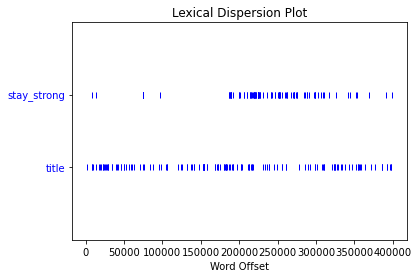

In [60]:
ukraine_tokens.dispersion_plot(["stay_strong", "title"])

### Similar Words

In [61]:
ukraine_tokens.similar('partner')

like ukraine time help nt hey language ukrainian friends planning want
guys buy told family company far worth russians hello


### Common Context

In [62]:
ukraine_tokens.common_contexts(['Ukrainian', 'War'])  

ukraine_started fight_young knowledge_politics russian_year
russian_putin


## 2.4 Incorporating Time


In [63]:
pd.to_datetime(1207632114, unit='s')

Timestamp('2008-04-08 05:21:54')

In [64]:
#new colum with date and time
df.insert(loc=3, column='created_datetime', value=pd.to_datetime(df['created'], unit='s'))
df.head(3)

,idint,idstr,created,created_datetime,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,2011-03-06 07:40:32,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,2011-05-25 17:14:57,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,2011-05-29 03:30:50,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN


In [65]:
#create new variables years
years = pd.DatetimeIndex(df['created_datetime']).year
print(years)

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='created_datetime', length=12402)


In [66]:
df.head(3)

,idint,idstr,created,created_datetime,nsfw,author,title,selftext,lemmas,score,distinguish,textlen,num_comments,flair_text,flair_css_class
0,26795140,t3_fyb9g,1299397232,2011-03-06 07:40:32,0,pozhaluista,Does the /r/ Ukraine have anyone here? Hello?,Seems quiet.,quiet,10,NaN,13,24,NaN,NaN
1,29482904,t3_hjx5k,1306343697,2011-05-25 17:14:57,0,visarun,Does immigration in Simferpol check whether th...,I have stayed 70 days and then 80 days out of ...,stayed days days days know borispol pretty str...,0,NaN,223,1,NaN,NaN
2,29608809,t3_hmmax,1306639850,2011-05-29 03:30:50,0,[deleted],Tickets to Ukraine from Seoul?,Hi everyone. I'd like to visit Ukraine for th...,hi like visit ukraine time looking cheap ticke...,2,NaN,281,0,NaN,NaN


In [67]:
#before 2013
df_2013 = df.loc[(years <= 2013), :]
len(df_2013)

110

In [68]:
#after 2013 & before 2022
df_b2022 = df.loc[(years <= 2022) & (years >=2013), :]
len(df_b2022)

12292

In [69]:
#after 2022
df_a2022 = df.loc[(years >= 2022), :]
len(df_a2022)

6900

In [77]:
# visualize data ###3 different bars + normalized(count -> proportion)
#before 2013
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.histplot(
    data=df_2013,
    x=years,
    hue="flair_css_class",
    multiple="stack")

plt.xticks(rotation=70)
plt.tight_layout()

ValueError: Length of Int64Index vectors must match length of `data` when both are used, but `data` has length 110 and the vector passed to `x` has length 12402.

In [ ]:
#after 2013 & before 2022
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.histplot(
    data=df_b2022,
    x=years,
    hue="flair_css_class",
    multiple="stack")

plt.xticks(rotation=70)
plt.tight_layout()

In [ ]:
#after 2022
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.histplot(
    data=df_a2022,
    x=years,
    hue="flair_css_class",
    multiple="stack")

plt.xticks(rotation=70)
plt.tight_layout()

# Term Frequency-Inverse Document Frequency (TF-IDF)

In [71]:
aita = pd.read_csv('ukraine_lemmas.csv')

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True)

# Fit and transform the texts
tfidf = tfidf_vectorizer.fit_transform(aita['lemmas'])

In [73]:
# Place TF-IDF values in a DataFrame
df = pd.DataFrame(tfidf.todense(), columns=tfidf_vectorizer.get_feature_names_out().ravel())

In [74]:
df.head(20)

,00,000,00013962,000147123,000eur,000l,000tanks,000uah,000what,001,...,zwarich,zwarych,zwastika,zwinigarodka,zwmz5wila1i,zxrsnefzrzk81,zygres,zytnia,zz155uergki71,zzwhcfjv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# highest "average" TF-IDF across documents
df.argmax(axis=1)

AttributeError: 'DataFrame' object has no attribute 'argmax'

# Using TF-IDF to find Similar Posts

In [ ]:
doc_idx = 25

In [ ]:
aita['selftext'].iloc[doc_idx]

In [ ]:
df.loc[doc_idx].sort_values(ascending=False)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(tfidf)
similarities.shape

In [ ]:
similar_df = pd.DataFrame({
    'text': aita['selftext'].values,
    'score': similarities[doc_idx]}).sort_values('score', ascending=False)

In [ ]:
similar_df['text'].iloc[0]

In [ ]:
similar_df['text'].iloc[1]

In [ ]:
similar_df['text'].iloc[2]